<div style = "color : darkblue;"><b>

#### Season VII. <br>Soloution by Habib Ezatabadi

</div></b>

<hr><hr><br><br>

#### EX.1 <br>
 7.1 The matrix below shows the correlations between ratings on nine
statements about pain made by 123 people suffering from extreme pain.
Each statement was scored on a scale from 1 to 6, ranging from agreement
to disagreement. The nine pain statements were as follows:
1. Whether or not I am in pain in the future depends on the skills of the
doctors.
2. Whenever I am in pain, it is usually because of something I have done
or not done.
3. Whether or not I am in pain depends on what the doctors do for me.
4. I cannot get any help for my pain unless I go to seek medical advice.
5. When I am in pain, I know that it is because I have not been taking
proper exercise or eating the right food.
6. People’s pain results from their own carelessness.
7. I am directly responsible for my pain,
8. relief from pain is chiefly controlled by the doctors.
9. People who are never in pain are just plain lucky.

In [19]:
library(tidyverse)
library(sem)
library(corrplot)
library(semPlot)
library(fs)
library(pdftools)
library(magick)
library(cowplot)

In [3]:
input3 <- textConnection("
1.00
-0.04 1.00
0.61 -0.07 1.00
0.45 -0.12 0.59 1.00
0.03 0.49 0.03 -0.08 1.00
-0.29 0.43 -0.13 -0.21 0.47 1.00
-0.30 0.30 -0.24 -0.19 0.41 0.63 1.00
0.45 -0.31 0.59 0.63 -0.14 -0.13 -0.26 1.00
0.30 -0.17 0.32 0.37 -0.24 -0.15 -0.29 0.40 1.00
")
dat_3 <- readLines(input3)
n <- 123
corr_mat_2 <- matrix(NA, 9, 9)
j <- 1
for(i in 2:10){
    dat_3[i] %>% strsplit(" ") %>% unlist %>% as.numeric-> temp
    corr_mat_2[j, 1:(i-1)] <- corr_mat_2[1:(i-1), j] <- temp
    j <- j + 1
}

In [4]:
name1 <- paste0("statement", 1:9)
dimnames(corr_mat_2) <- list(name1, name1)
corr_mat_2

,statement1,statement2,statement3,statement4,statement5,statement6,statement7,statement8,statement9
statement1,1.00,-0.04,0.61,0.45,0.03,-0.29,-0.30,0.45,0.30
statement2,-0.04,1.00,-0.07,-0.12,0.49,0.43,0.30,-0.31,-0.17
statement3,0.61,-0.07,1.00,0.59,0.03,-0.13,-0.24,0.59,0.32
statement4,0.45,-0.12,0.59,1.00,-0.08,-0.21,-0.19,0.63,0.37
statement5,0.03,0.49,0.03,-0.08,1.00,0.47,0.41,-0.14,-0.24
statement6,-0.29,0.43,-0.13,-0.21,0.47,1.00,0.63,-0.13,-0.15
statement7,-0.30,0.30,-0.24,-0.19,0.41,0.63,1.00,-0.26,-0.29
statement8,0.45,-0.31,0.59,0.63,-0.14,-0.13,-0.26,1.00,0.40
statement9,0.30,-0.17,0.32,0.37,-0.24,-0.15,-0.29,0.40,1.00


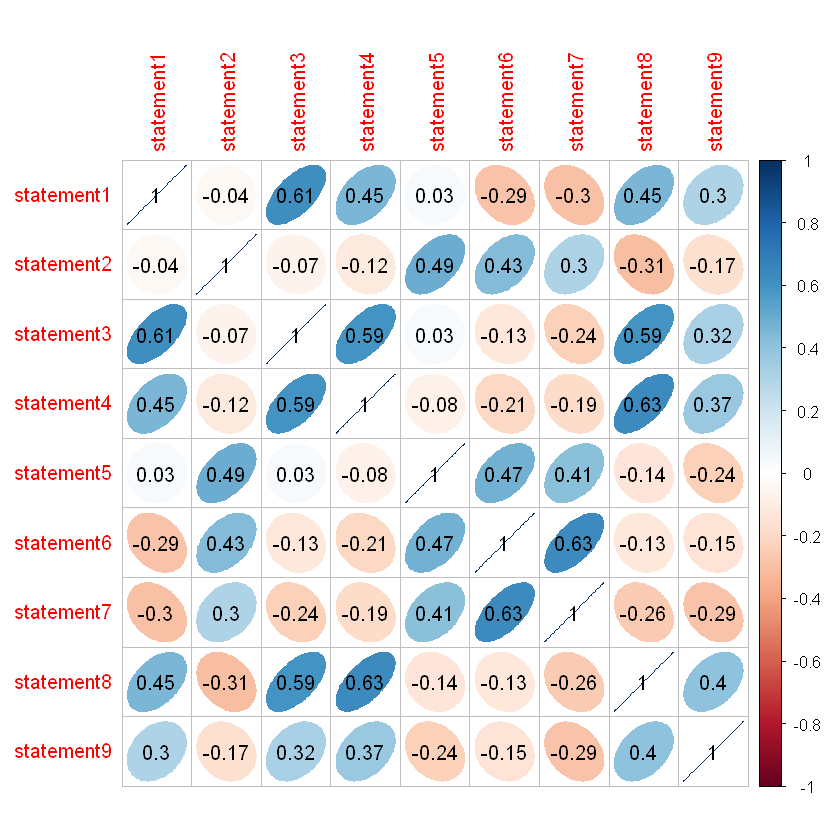

In [5]:
corr_mat_2 %>%
corrplot(method = "ellipse", type = "full", is.corr = T, 
col.lim = c(-1, 1), p.mat = corr_mat_2, insig = "p-value", 
sig.level = -.4
)

In [6]:
patient_model <- specifyModel(file = file.choose())

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations



In [7]:
cfa_patient <- sem(patient_model, S = corr_mat_2, N = 123)

In [8]:
summary(cfa_patient)
attributes(cfa_patient)


 Model Chisquare =  99.39977   Df =  27 Pr(>Chisq) = 3.229094e-10
 AIC =  135.3998
 BIC =  -30.52921

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.2032 -0.5371  0.0000  0.1569  0.6722  4.4181 

 R-square for Endogenous Variables
statement1 statement3 statement4 statement8 statement2 statement5 statement6 
    0.4449     0.6502     0.5695     0.5720     0.2804     0.3494     0.6927 
statement7 
    0.5350 

 Parameter Estimates
        Estimate   Std Error  z value   Pr(>|z|)    
lambda1  0.6670173 0.08657199  7.704771 1.310781e-14
lambda2  0.8063408 0.08164213  9.876528 5.262474e-23
lambda3  0.7546241 0.08341040  9.047122 1.467856e-19
lambda4  0.7562965 0.08335235  9.073487 1.152677e-19
gamma1   0.5295387 0.09314848  5.684888 1.308985e-08
gamma2   0.5911277 0.09149425  6.460818 1.041384e-10
gamma3   0.8323020 0.08700206  9.566463 1.106251e-21
gamma4   0.7314687 0.08859275  8.256531 1.499678e-16
theta1   0.5550877 0.08394571  6.612461 3.779834e-11
theta2   

$names
 [1] "var.names"   "ram"         "S"           "J"           "n.fix"      
 [6] "n"           "N"           "m"           "t"           "raw"        
[11] "data"        "semmod"      "optimizer"   "objective"   "coeff"      
[16] "vcov"        "par.posn"    "convergence" "iterations"  "criterion"  
[21] "C"           "A"           "P"           "adj.obj"     "robust.vcov"

$class
[1] "objectiveML" "sem"

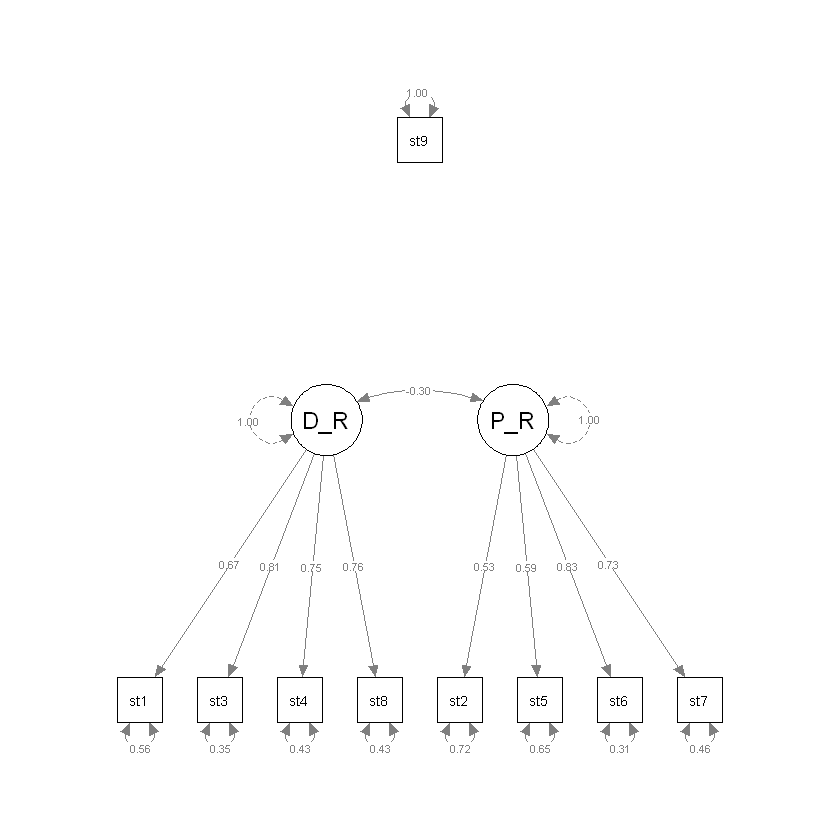

In [9]:
semPaths(cfa_patient, intercept = TRUE, whatLabel = "est",
         residuals = TRUE, exoCov = TRUE)

In [11]:
pathDiagram(cfa_patient, edge.labels = "values", 
ignore.double = FALSE, output.type = "graphics")


Running  dot -Tpdf -o pathDiagram.pdf -Gcharset=latin1  pathDiagram.dot 


In [ ]:
file_show(file.choose())

Converting page 1 to pathDiagram_1.png... done!


[1] "pathDiagram_1.png"

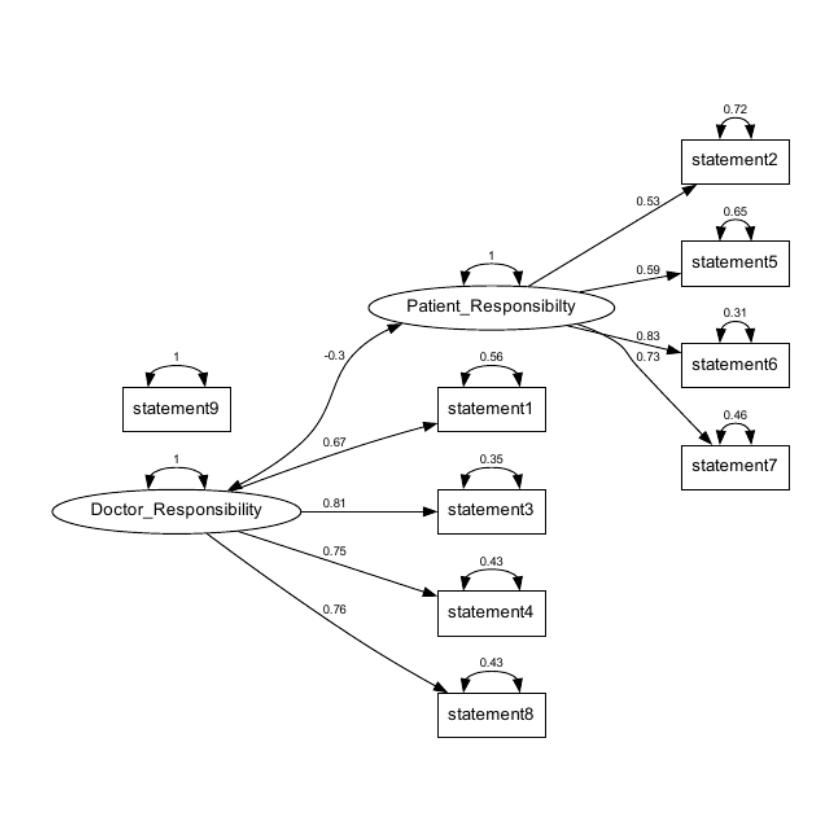

In [21]:
pdf_convert(pdf = file.choose())
ggdraw() + 
draw_image(file.choose()) 

In [65]:
var_cov <- vcov(cfa_patient)
var_rho <- var_cov[18, 18]
sd_rho <- sqrt(var_rho)
sd_rho

[1] 0.1013639

In [68]:
coef(cfa_patient)[18] -> rho_ 
rho_

rho 
-0.3049759

In [70]:
zz <- qnorm(.975)
CI_rho <- c(lower_bond = rho_ - zz * sd_rho, Upper_bond = rho_ + zz * sd_rho)
CI_rho %>% as.data.frame

,.
,<dbl>
lower_bond.rho,-0.5036455
Upper_bond.rho,-0.1063064


<hr>

<br><br><br>


#### EX. II
For the stability of alienation example, fit the model in which the
measurement errors for anomia in 1967 and anomia in 1971 are allowed
to be correlated.

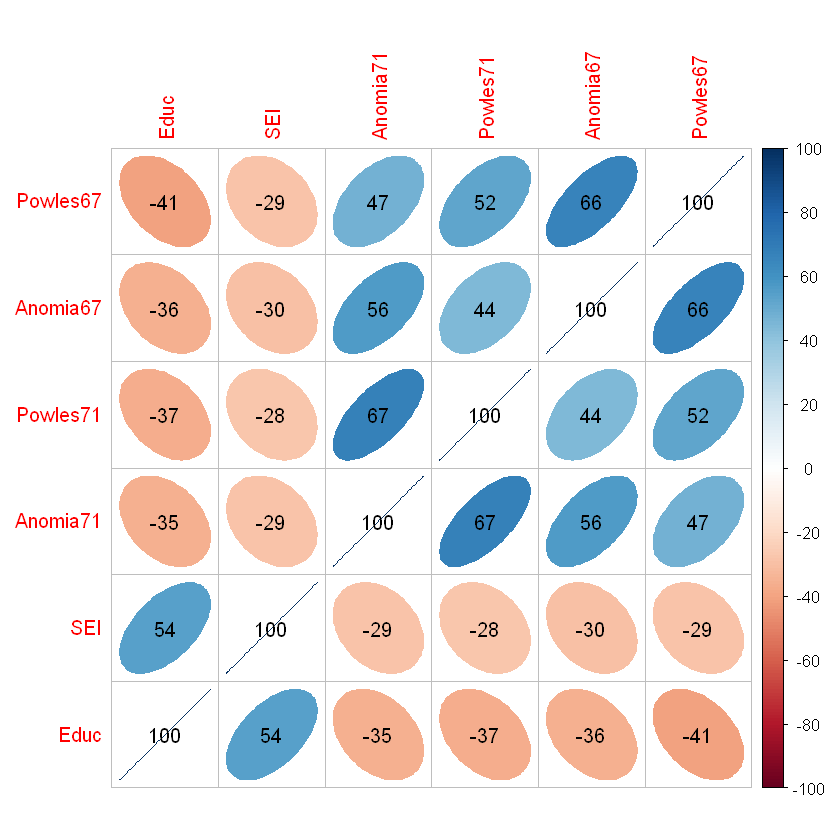

In [81]:
cor_mat_alin <- matrix(c(
    -41, -36, -37, -35, 54, 100, 
    -29, -30, -28, -29, 100, 54, 
    47, 56, 67, 100, -29, -35, 
    52, 44, 100, 67, -28, -37, 
    66, 100, 44, 56, -30, -36, 
    100, 66, 52, 47, -29, -41
), 6, 6, 
dimnames = list(c("Powles67", "Anomia67", "Powles71", 
"Anomia71", "SEI", "Educ"), rev(c("Powles67", "Anomia67", "Powles71", 
"Anomia71", "SEI", "Educ"))))

cor_mat_alin %>%
corrplot(method = "ellipse", type = "full", is.corr = F, 
col.lim = c(-100, 100), p.mat = cor_mat_alin, insig = "p-value", 
sig.level = -50
)

In [85]:
cor_mat_alin[, 6:1] * 0.01 -> cor_mat_alin2
cor_mat_alin2

,Powles67,Anomia67,Powles71,Anomia71,SEI,Educ
Powles67,1.00,0.66,0.52,0.47,-0.29,-0.41
Anomia67,0.66,1.00,0.44,0.56,-0.30,-0.36
Powles71,0.52,0.44,1.00,0.67,-0.28,-0.37
Anomia71,0.47,0.56,0.67,1.00,-0.29,-0.35
SEI,-0.29,-0.30,-0.28,-0.29,1.00,0.54
Educ,-0.41,-0.36,-0.37,-0.35,0.54,1.00


In [86]:
alin_model <- specifyModel(file = file.choose())

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations



In [88]:
alin_sem_model <- sem(alin_model, S = cor_mat_alin2, N = 932)
alin_sem_model %>% summary


 Model Chisquare =  6.383423   Df =  5 Pr(>Chisq) = 0.2706768
 AIC =  38.38342
 BIC =  -27.80324

 Normalized Residuals
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9555102 -0.1327124 -0.0430509 -0.0920843  0.0000007  0.5476490 

 R-square for Endogenous Variables
        Educ          SEI Alienation67     Anomia67     Powles67 Alienation71 
      0.7158       0.4074       0.3065       0.5726       0.7636       0.5010 
    Anomia71     Powles71 
      0.6169       0.7312 

 Parameter Estimates
        Estimate   Std Error  z value    Pr(>|z|)    
lambda1  0.7543931 0.06155871  12.254855 1.582322e-34
lambda2  1.1540662 0.05972950  19.321546 3.538930e-83
lambda3  1.0875265 0.05534577  19.649678 5.818061e-86
beta1   -0.4954858 0.04813368 -10.293953 7.503160e-25
beta2   -0.1853038 0.04314947  -4.294461 1.751179e-05
beta3    0.5998556 0.04829399  12.420917 2.012419e-35
theta1   0.2841926 0.05370266   5.291965 1.210093e-07
theta2   0.5926277 0.04040242  14.668124 1.

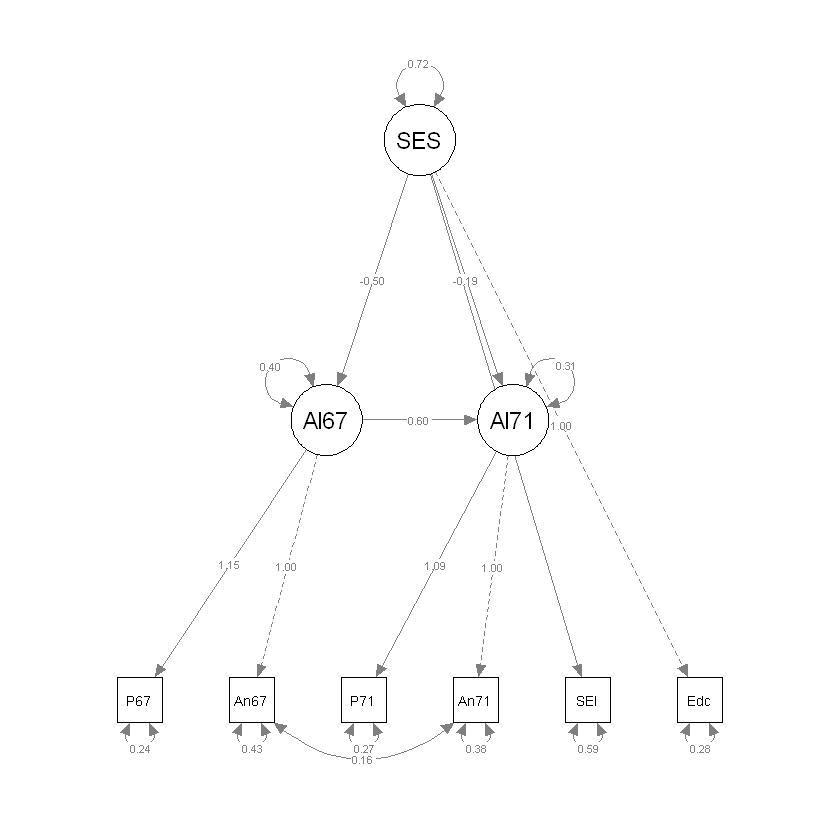

In [89]:
semPaths(alin_sem_model, intercept = TRUE, whatLabel = "est",
         residuals = TRUE, exoCov = TRUE)

<hr>
<br><br>

#### EX III.
 Meyer and Bendig (1961) administered the five Thurstone Primary
Mental Ability tests, verbal meaning (V), space (S), reasoning (R), numerical (N), and word fluency (W), to 49 boys and 61 girls in grade 8 and
again three and a half years later in grade 11. The observed correlation
matrix is shown below. Fit a single-factor model to the correlations that
allows the factor at time one to be correlated with the factor at time two.

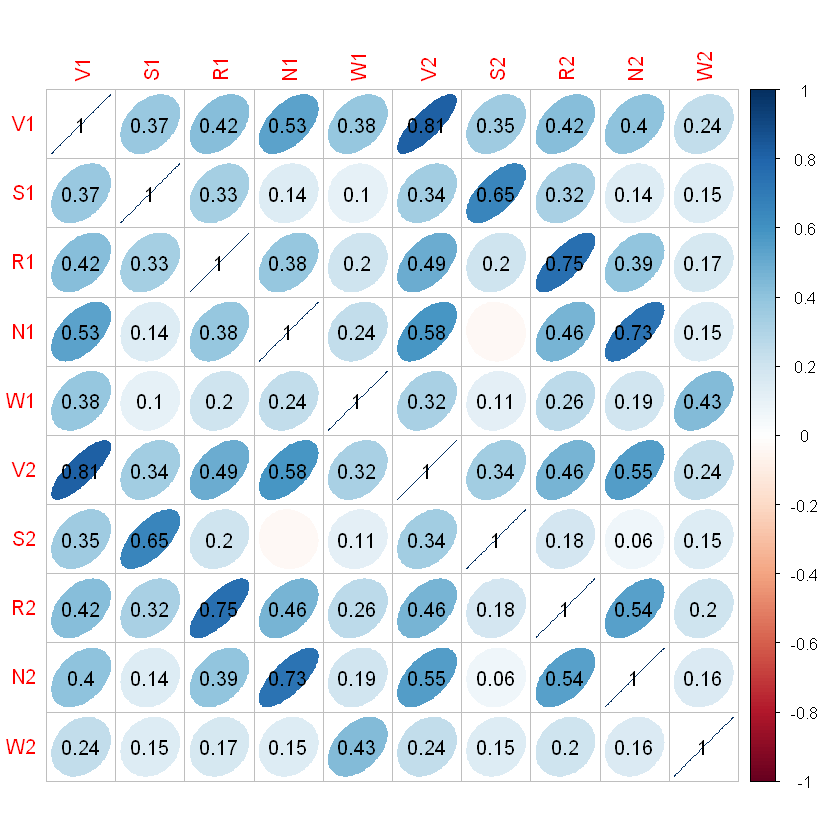

In [23]:
cor_mat_Mental <- matrix(c(
    1, .37, .42, .53, .38, .81, .35, .42, .4, .24, 
    .37, 1, .33, .14, .1, .34, .65, .32, .14, .15, 
    .42, .33, 1, .38, .2, .49, .2, .75, .39, .17, 
    .53, .14, .38, 1, .24, .58, -.04, .46, .73, .15, 
    .38, .1, .2, .24, 1, .32, .11, .26, .19, .43, 
    .81, .34, .49, .58, .32, 1, .34, .46, .55, .24, 
    .35, .65, .20, -.04, .11, .34, 1, .18, .06, .15,
    .42, .32, .75, .46, .26, .46, .18, 1, .54, .2, 
    .4, .14, .39, .73, .19, .55, .06, .54, 1, .16, 
    .24, .15, .17, .15, .43, .24, .15, .2, .16, 1
), 10, 10, dimnames = list(
    c("V1", "S1", "R1", "N1", "W1", 
    "V2", "S2", "R2", "N2", "W2"), 
    c("V1", "S1", "R1", "N1", "W1", 
    "V2", "S2", "R2", "N2", "W2")
))

cor_mat_Mental %>%
corrplot(method = "ellipse", type = "full", is.corr = F, 
col.lim = c(-1, 1), p.mat = cor_mat_Mental, insig = "p-value", 
sig.level = .01
)

In [24]:
Mental_model <- specifyModel(file = file.choose())

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations



In [25]:
Mental_sem_model <- sem(Mental_model, S = cor_mat_Mental, 
N = 110)
summary(Mental_sem_model)


 Model Chisquare =  209.9022   Df =  34 Pr(>Chisq) = 3.20978e-27
 AIC =  251.9022
 BIC =  50.08584

 Normalized Residuals
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.86419 -0.41300 -0.06658  0.09820  0.38220  5.21370 

 R-square for Endogenous Variables
    V1     S1     R1     N1     W1     V2     S2     R2     N2     W2 
0.5774 0.1578 0.3949 0.4384 0.1256 0.6921 0.1055 0.4317 0.3742 0.0853 

 Parameter Estimates
        Estimate  Std Error  z value   Pr(>|z|)     
sigma1  0.4225585 0.06427550  6.574177  4.892307e-11
sigma2  0.8421795 0.11425846  7.370828  1.695715e-13
sigma3  0.6051160 0.08425325  7.182109  6.864408e-13
sigma4  0.5616346 0.07915110  7.095727  1.286735e-12
sigma5  0.8743647 0.11852515  7.377039  1.618487e-13
sigma6  0.3079086 0.05495071  5.603360  2.102364e-08
sigma7  0.8945123 0.12172768  7.348471  2.004876e-13
sigma8  0.5682534 0.08092615  7.021877  2.189075e-12
sigma9  0.6257669 0.08781402  7.126048  1.032918e-12
sigma10 0.9146568 0.12433763  7.35623

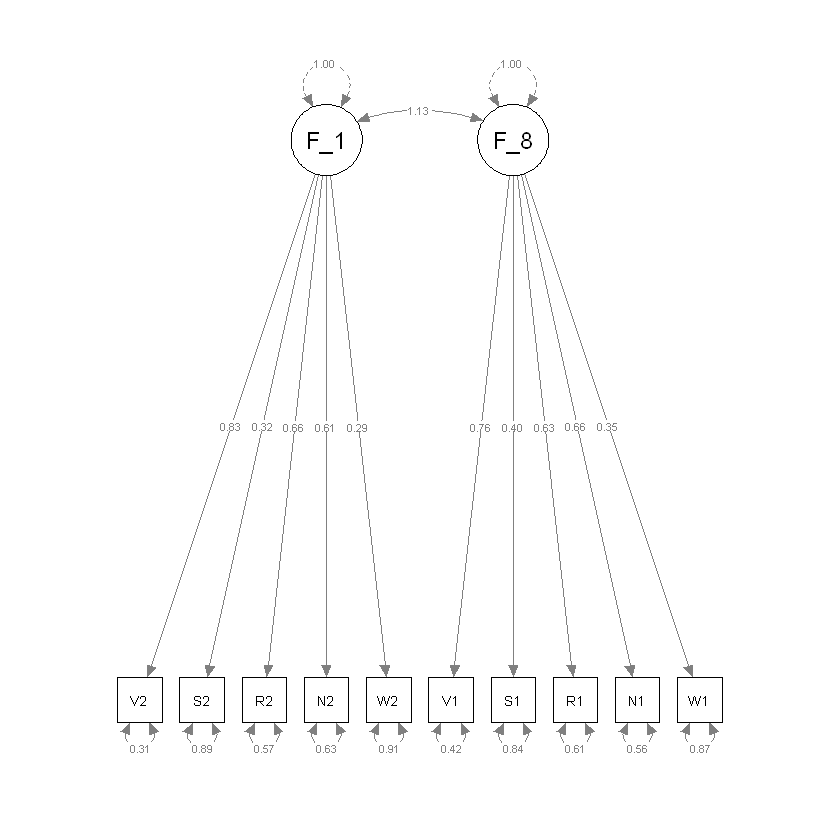

In [26]:
semPaths(Mental_sem_model, intercept = TRUE, whatLabel = "est",
         residuals = TRUE, exoCov = TRUE)

In [27]:
Mental_model2 <- specifyModel(file.choose())

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations



In [28]:
Mental_sem_model2 <- sem(model = Mental_model2, S = cor_mat_Mental, 
N = 110)
summary(Mental_sem_model2)


 Model Chisquare =  51.45623   Df =  29 Pr(>Chisq) = 0.006264021
 AIC =  103.4562
 BIC =  -84.8577

 Normalized Residuals
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.50516 -0.22210 -0.01919 -0.02178  0.28440  1.37313 

 R-square for Endogenous Variables
    V1     S1     R1     N1     W1     V2     S2     R2     N2     W2 
0.5936 0.1637 0.3355 0.4734 0.1573 0.7027 0.0982 0.3732 0.4322 0.0850 

 Parameter Estimates
        Estimate  Std Error  z value   Pr(>|z|)     
sigma1  0.4036882 0.09858661  4.094757  4.226120e-05
sigma2  0.8402524 0.11973805  7.017422  2.259990e-12
sigma3  0.6558103 0.10280364  6.379252  1.779551e-10
sigma4  0.5383412 0.09841141  5.470312  4.492429e-08
sigma5  0.8427873 0.11983661  7.032803  2.024245e-12
sigma6  0.2980520 0.09605786  3.102839  1.916741e-03
sigma7  0.9043024 0.12571512  7.193267  6.325903e-13
sigma8  0.6157998 0.09854135  6.249152  4.126879e-10
sigma9  0.5708407 0.09836190  5.803473  6.495512e-09
sigma10 0.9163341 0.12691620  7.21999

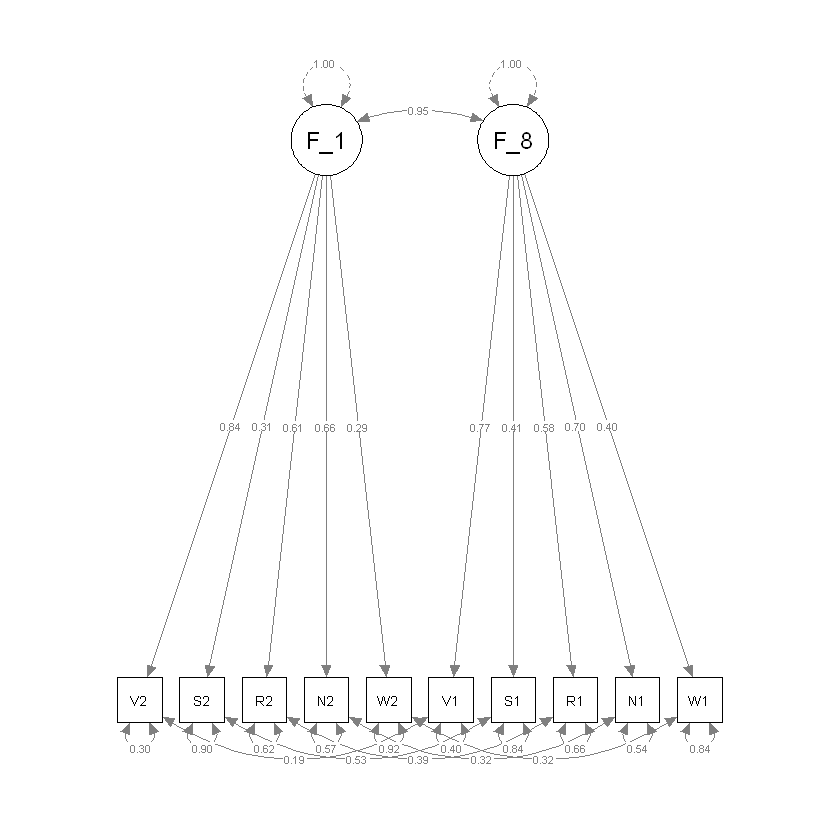

In [29]:
semPaths(Mental_sem_model2, intercept = TRUE, whatLabel = "est",
         residuals = TRUE, exoCov = TRUE)

In [30]:
pathDiagram(Mental_sem_model2, edge.labels = "values", 
ignore.double = FALSE, output.type = "graphics")

Running  dot -Tpdf -o pathDiagram.pdf -Gcharset=latin1  pathDiagram.dot 


Converting page 1 to pathDiagram_1.png... done!


[1] "pathDiagram_1.png"

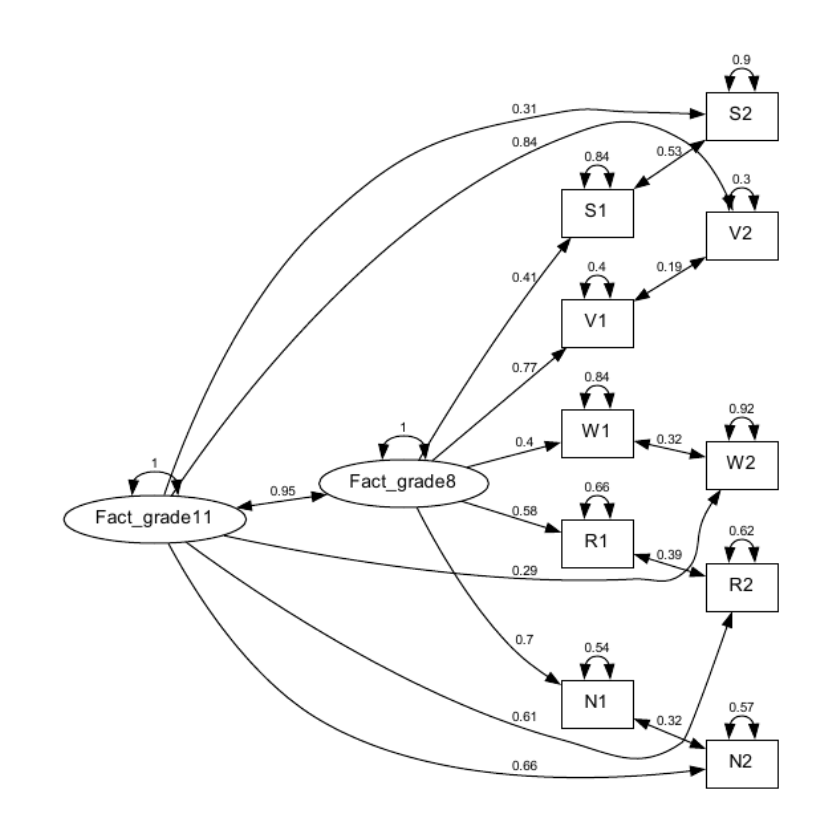

In [31]:
pdf_convert(pdf = file.choose())
ggdraw() + 
draw_image(file.choose()) 